<a href="https://colab.research.google.com/github/SaehyunC/localization/blob/master/answer/localization_assignment2_1D_Bayes_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sim

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time


def create_poles(poles, distance):
    y = np.zeros(distance)
    for p in poles:
        y[p] = 1
    x = range(distance)
    plt.stem(x, y)
    #plt.stem(x, y, use_line_collection=True)


def plot_poles(poles, distance):
    plt.subplot(311)
    plt.yticks([])
    plt.xticks([])
    plt.xlim([-0.9, distance + 0.9])
    create_poles(poles, distance)


def plot_belief(y, distance):
    plt.subplot(312)
    plt.yticks([])
    plt.xlim([-0.9, distance + 0.9])
    plt.plot([0, distance], [0, 0], '-b')
    x = range(distance)
    for i in range(distance):
        plt.plot([i, i], [0, y[i]], '-b')


def plot_current_measurement(loc, poles, distance):
    plt.subplot(313)
    plt.yticks([])
    plt.xticks([])
    plt.xlim([loc - 1.5, loc + 1.5])
    plt.ylim([-0.1, 1.1])

    plt.plot([loc + 0.2], [0.6], 'g<', markersize=40)
    plt.plot([loc], [0.4], 'bo', markersize=40)
    create_poles(poles, distance)


def plot(distance, poles, P_loc_i_posterior, robot, block=False, pause_time=1):
    if robot.detect_pole(poles):
        block = True
    plot_poles(poles, distance)
    plot_belief(P_loc_i_posterior, distance)
    plot_current_measurement(robot.loc, poles, distance)
    if block:
        plt.show()
    else:
        plt.pause(0.1)
        plt.show(block=block)
        plt.pause(pause_time)
        plt.close()

# assignment 2-1

initial location


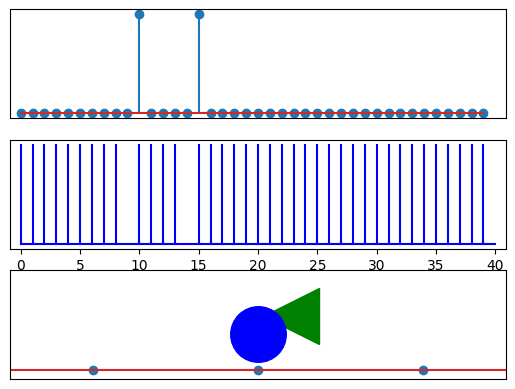

1th movement


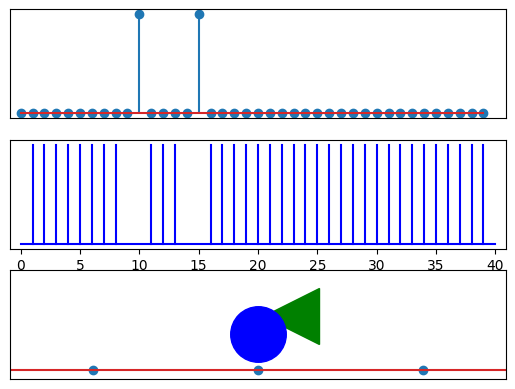

2th movement


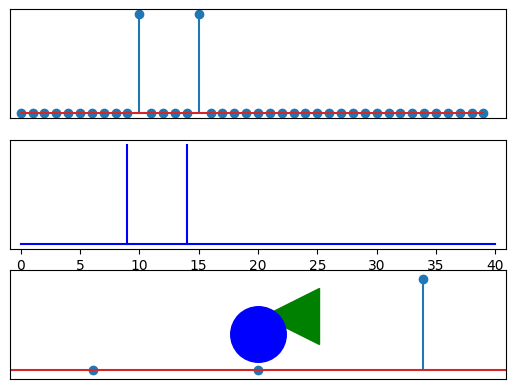

3th movement


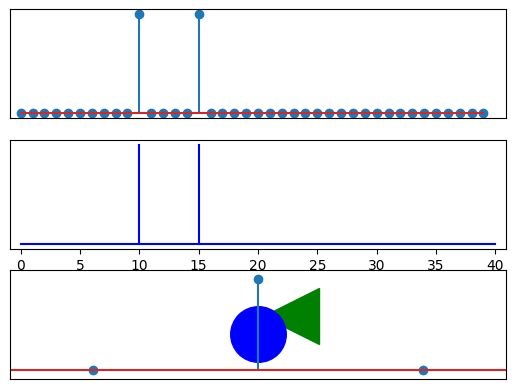

4th movement


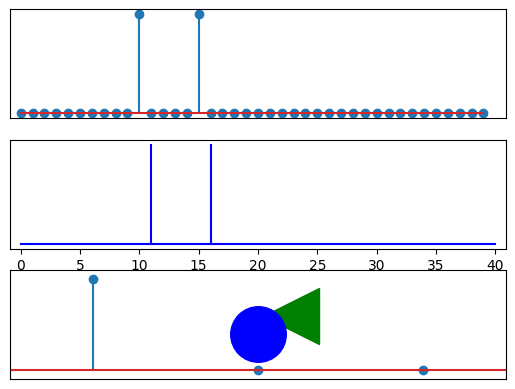

5th movement


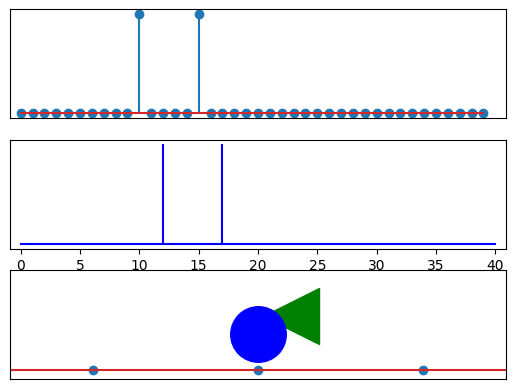

6th movement


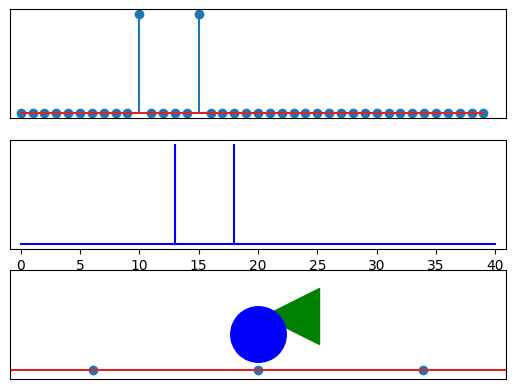

7th movement


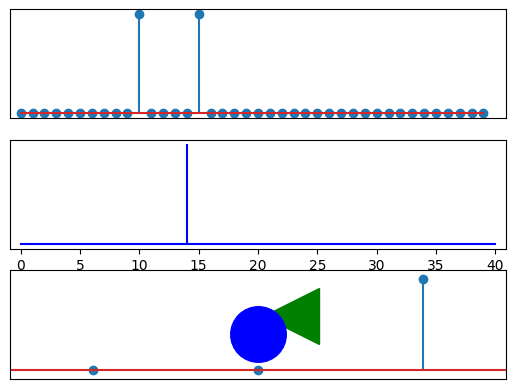

8th movement


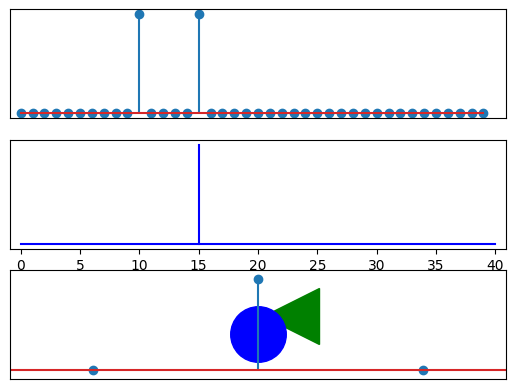

9th movement


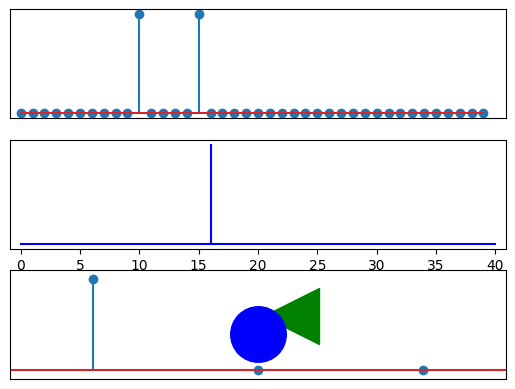

10th movement


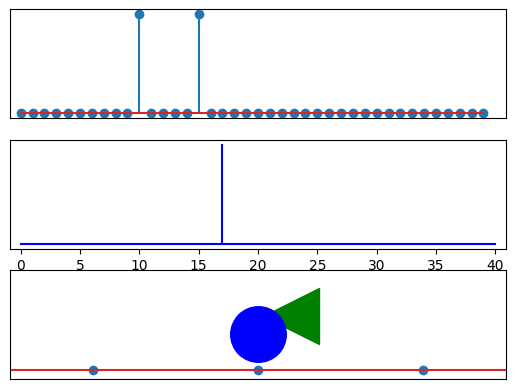

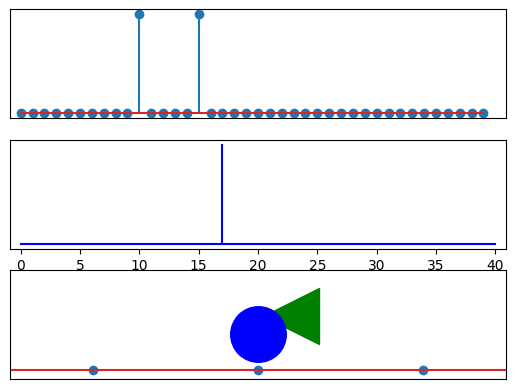

In [17]:
import numpy as np


class Robot:
    def __init__(self):
        self.loc = 0

    def move(self):
        self.loc += 1

    def detect_pole(self, poles):
        if self.loc + 1 in poles:
            return True
        else:
            return False


def bayes(PBA, PA, PB):
    # STUDENT CODE START
    # Make this function return the answer to Bayes Rule.
    # P(A|B) = P(B|A)*P(A) / P(B)
    PAB = (PBA * PA) / PB
    # STUDENT CODE END
    return PAB


def shift_priors(P_loc_i):
    # STUDENT CODE START
    # Shift all probabilities to the right by one.
    shifted = np.roll(P_loc_i, 1)
    shifted [0] = 0
    return shifted
    # STUDENT CODE END


def update_loc_probability():
    global P_loc_i_posterior, P_D, P_not_D, P_loc_i_prior
    # STUDENT CODE START
    # Perform Bayes Rule on each location.
    if robot.detect_pole(poles):
        # 폴을 감지했을 때: P_loc_i_posterior = (P(D|Li) * P(Li)) / P(D)
        P_loc_i_posterior = bayes(P_D_given_loc_i, P_loc_i_prior, P_D)
    else:
        # 폴을 감지하지 못했을 때: P_loc_i_posterior = (P(!D|Li) * P(Li)) / P(!D)
        P_loc_i_posterior = bayes(P_not_D_given_loc_i, P_loc_i_prior, P_not_D)
    # normalizing the probability
    P_loc_i_posterior = P_loc_i_posterior / np.sum(P_loc_i_posterior)
    # STUDENT CODE END


distance = 40

robot = Robot()
robot.loc = 7
poles = [10, 15]

# P_loc_i_prior = P(Li) - Prior (before doing Bayes Rule) belief of being in location i.
# P_loc_i_posterior = P(Li|D) or P(Li|!D) - Updated belief of being in location i, after performing Bayes Rule.
# P_D = P(D) - Total Probability of Detecting a Pole.
# P_not_D = P(!D) - Total Probability of Not Detecting Pole.
# P_D_given_loc_i = P(D|Li) - Probability of detecting a pole, given we are in location i.
# P_not_D_given_loc_i = P(!D|Li) - Probability of not detecting a pole,
# given we are in location i.

# I'm initalizing variables (generally not done in python) so you can see what is a vector vs scalar.
# Setup bayes probabilities. Create as many probabilities or beliefs as
# there are discrete locations the robot can occupy.
P_loc_i_prior = np.zeros(distance)
P_loc_i_posterior = np.zeros(distance)
P_D = 0
P_not_D = 0
P_D_given_loc_i = np.zeros(distance)
P_not_D_given_loc_i = np.zeros(distance)



# STUDENT CODE START

# Set the prior as if the robot has equal probability to be in each location.
P_loc_i_prior = np.ones(distance) / distance
# Set probabilities of detecing a pole or not detecting a pole.
for i in range(distance):
    if i + 1 in poles:
        P_D_given_loc_i[i] = 1  # 폴이 바로 앞에 있으면 감지
    else:
        P_D_given_loc_i[i] = 0  # 폴이 없으면 감지 불가능

for i in range(distance):
    if i + 1 in poles:
        P_not_D_given_loc_i[i] = 0  # 폴이 바로 앞에 있으면 감지
    else:
        P_not_D_given_loc_i[i] = 1  # 폴이 없으면 감지 불가능
# Set the probabilities for detecting (or not detecting) a pole for each location i.
P_D = np.sum(P_D_given_loc_i * P_loc_i_prior)  # P(D) = Σ P(D|Li) * P(Li)
P_not_D = np.sum(P_not_D_given_loc_i * P_loc_i_prior)  # P(!D) = Σ P(!D|Li) * P(Li)

# STUDENT CODE END


P_loc_i_posteriors = []

# Setup done, run first calculation of robots location.
print('initial location')
update_loc_probability()
P_loc_i_posteriors.append(P_loc_i_posterior)
plot(distance, poles, P_loc_i_posterior, robot, block=True)

# Begin Moving
for j in range(10):
    robot.move()
    # Shift the priors to follow the robots movement.
    P_loc_i_posterior = shift_priors(P_loc_i_posterior)
    # Set prior to previous posterior, so we can start the cycle over again.
    P_loc_i_prior = P_loc_i_posterior
    # Perform Bayes Rule using new information about whether the robot can
    # detect a pole.
    print(f'{j+1}th movement')
    update_loc_probability()
    P_loc_i_posteriors.append(P_loc_i_posterior)
    plot(distance, poles, P_loc_i_posterior, robot)

plot(distance, poles, P_loc_i_posterior, robot, block=True, pause_time=1)

In [18]:
import pandas as pd
t = np.array(P_loc_i_posteriors)
df = pd.DataFrame(t)
print(df.T)

          0         1    2    3    4    5    6    7    8    9    10
0   0.026316  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8   0.026316  0.028571  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9   0.000000  0.000000  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
10  0.026316  0.000000  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
11  0.026316  0.028571  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0
12  0.026316  0.028571  0.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0
13  0.026316  0.028571  0.0  0.0  0.0  0.0  0.5 

# assignment 2-2

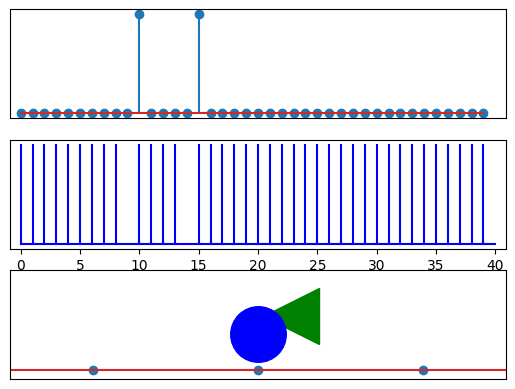

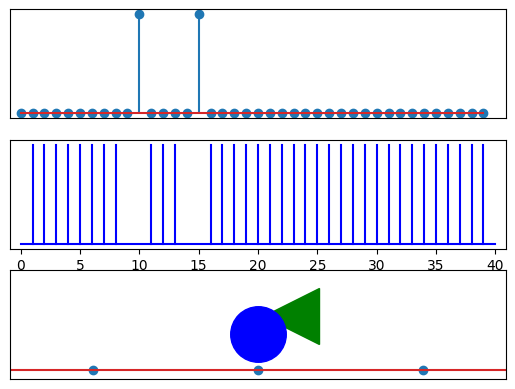

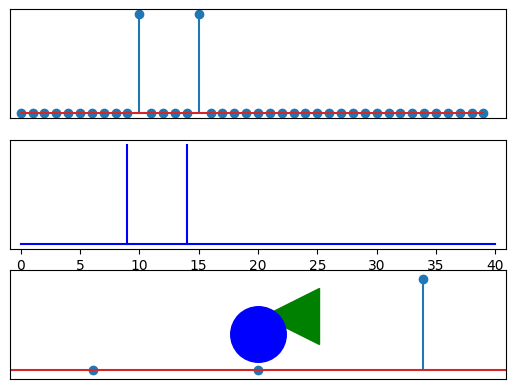

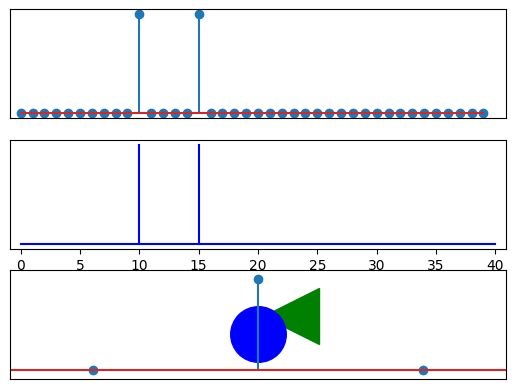

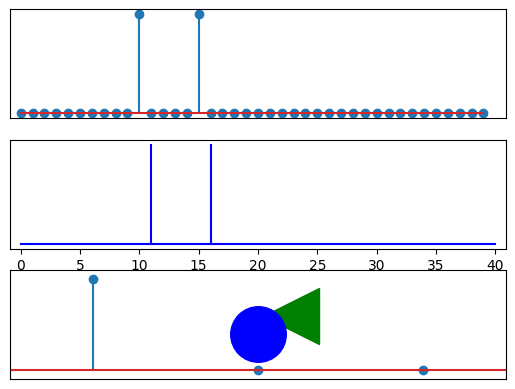

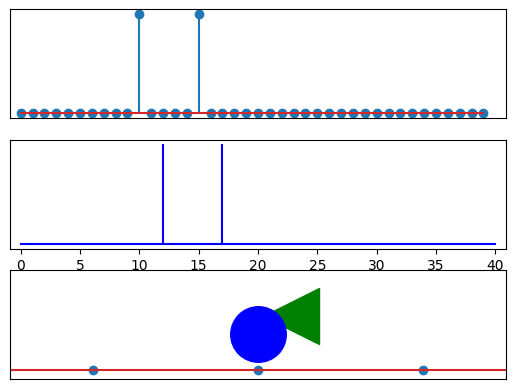

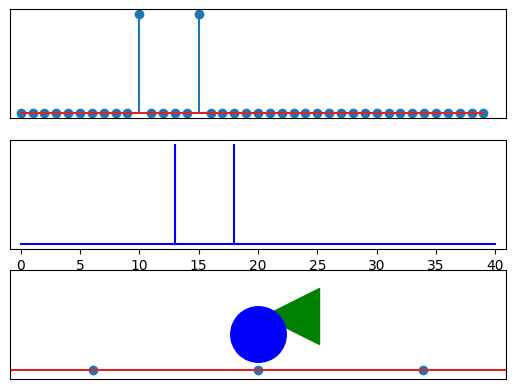

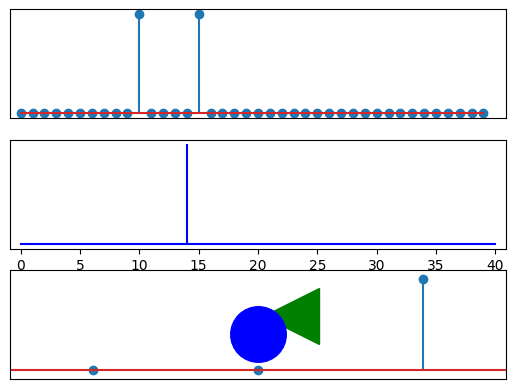

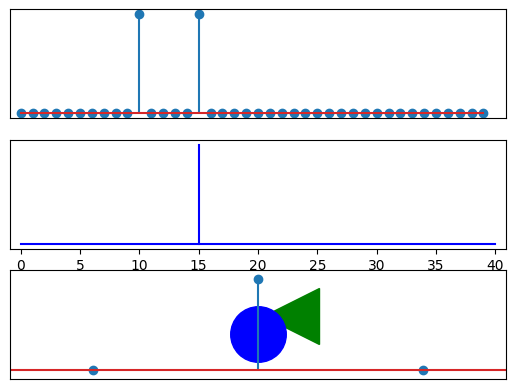

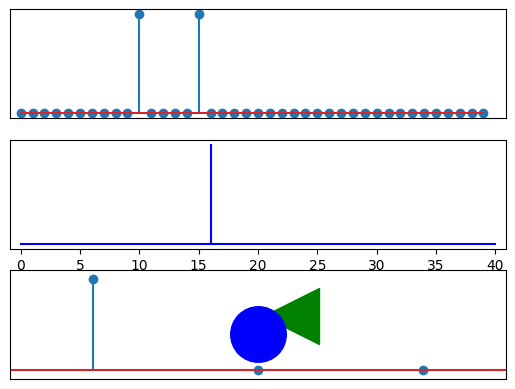

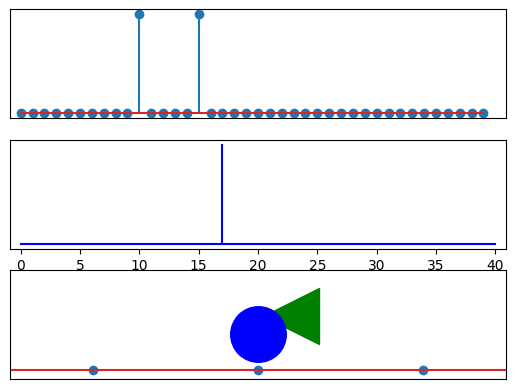

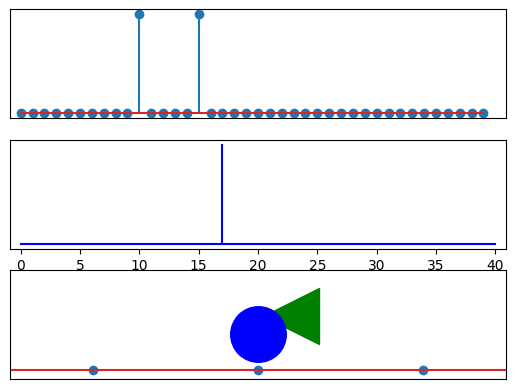

In [19]:
import numpy as np


class Robot:
    def __init__(self):
        self.loc = 0

    def move(self):
        self.loc += 1

    def detect_pole(self, poles):
        if self.loc + 1 in poles:
            return True
        else:
            return False


def bayes(PBA, PA, PB):
    # STUDENT CODE START
    # Make this function return the answer to Bayes Rule.
    return (PBA * PA) / PB
    # STUDENT CODE END


def shift_priors(P_loc_i):
    # STUDENT CODE START
    # Shift all probabilities to the right by one.
    global P_loc_i_posterior
    P_loc_i = np.roll(P_loc_i,1)
    P_loc_i[0] = 0
    P_loc_i_posterior = P_loc_i
    # STUDENT CODE END


def update_loc_probability():
    # STUDENT CODE START
    # Perform Bayes Rule on each location.
    global P_loc_i_posterior
    if robot.detect_pole(poles):
        P_loc_i_posterior = bayes(P_D_given_loc_i, P_loc_i_prior, P_D)
    else:
        P_loc_i_posterior = bayes(P_not_D_given_loc_i, P_loc_i_prior, P_D)
    P_loc_i_posterior = P_loc_i_posterior / np.sum(P_loc_i_posterior)
    # STUDENT CODE END


distance = 40

robot = Robot()
robot.loc = 7
poles = [10, 15]

# P_loc_i_prior = P(Li) - Prior (before doing Bayes Rule) belief of being in location i.
# P_loc_i_posterior = P(Li|D) or P(Li|!D) - Updated belief of being in location i, after performing Bayes Rule.
# P_D = P(D) - Total Probability of Detecting a Pole.
# P_not_D = P(!D) - Total Probability of Not Detecting Pole.
# P_D_given_loc_i = P(D|Li) - Probability of detecting a pole, given we are in location i.
# P_not_D_given_loc_i = P(!D|Li) - Probability of not detecting a pole,
# given we are in location i.

# I'm initalizing variables (generally not done in python) so you can see what is a vector vs scalar.
# Setup bayes probabilities. Create as many probabilities or beliefs as
# there are discrete locations the robot can occupy.
P_loc_i_posterior = np.zeros(distance)
P_D_given_loc_i = np.zeros(distance)
P_D = 0
P_not_D = 0
P_not_D_given_loc_i = np.zeros(distance)
P_loc_i_prior = np.zeros(distance)

# STUDENT CODE START
# Set the prior as if the robot has equal probability to be in each location.
P_loc_i_prior = np.ones(distance) / distance
# Set probabilities of detecing a pole or not detecting a pole.
for i in range(distance):
    if i+1 in poles:
        P_D_given_loc_i[i] = 1
    else:
        P_not_D_given_loc_i[i] = 1
# Set the probabilities for detecting (or not detecting) a pole for each location i.
P_D = np.sum(P_D_given_loc_i * P_loc_i_prior)
P_not_D = np.sum(P_not_D_given_loc_i * P_loc_i_prior)
# STUDENT CODE END


# Setup done, run first calculation of robots location.
update_loc_probability()
plot(distance, poles, P_loc_i_posterior, robot, block=True)

# Begin Moving
for j in range(10):
    robot.move()
    # Shift the priors to follow the robots movement.
    shift_priors(P_loc_i_posterior)
    # Set prior to previous posterior, so we can start the cycle over again.
    P_loc_i_prior = P_loc_i_posterior
    # Perform Bayes Rule using new information about whether the robot can
    # detect a pole.
    update_loc_probability()
    plot(distance, poles, P_loc_i_posterior, robot)

plot(distance, poles, P_loc_i_posterior, robot, block=True, pause_time=1)

In [22]:
print(P_loc_i_posterior)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
